In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/dimas/Documents/Programming/praktikum/ai/heart_failure_clinical_records_dataset.csv')

Reading data set

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Check, no of columns, type and null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Alterntaevily checking null values

In [5]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Ccheck unique value in Target collumn, which is Death_Event in our case

Co relation b/w all variables

<AxesSubplot:>

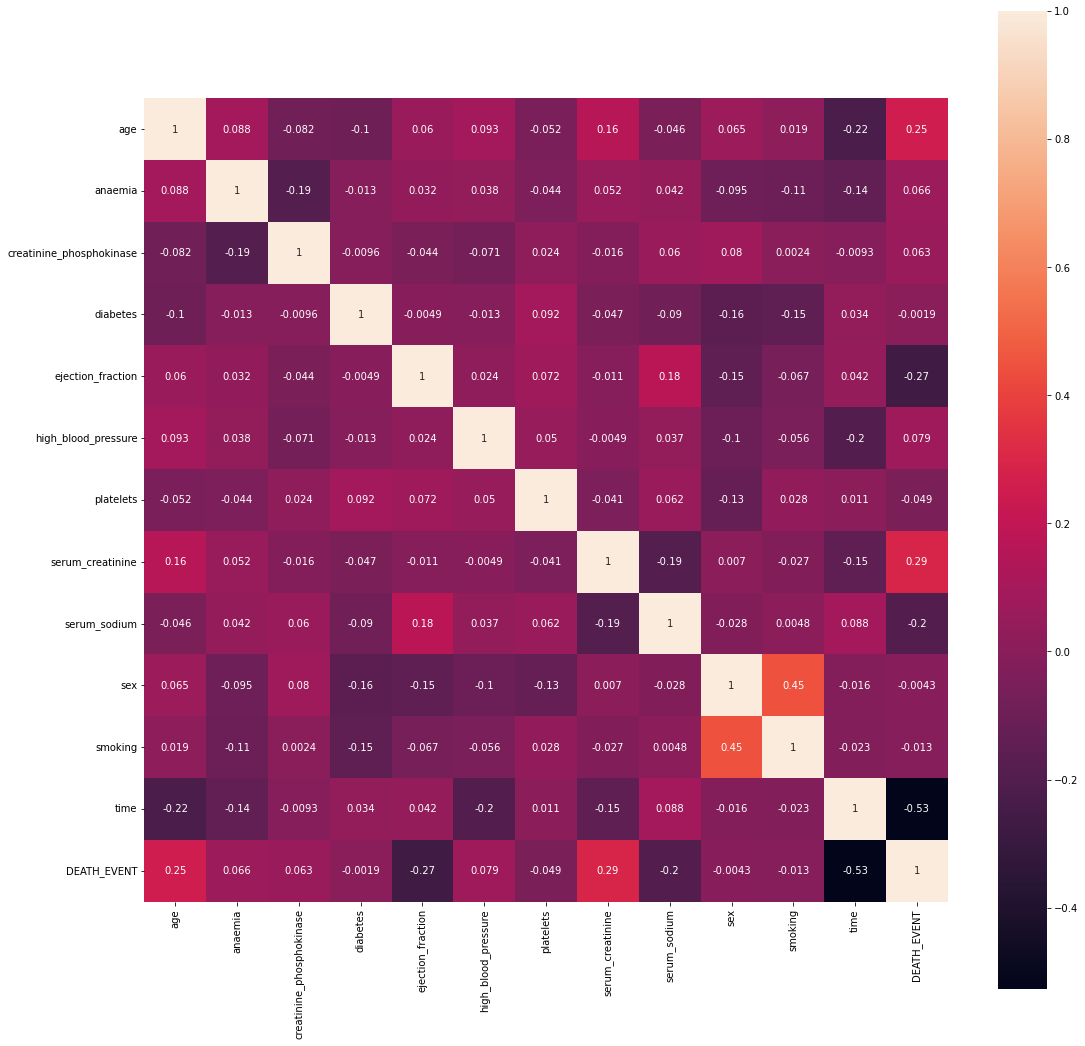

In [31]:
plt.subplots(figsize=(18,18))
sns.heatmap(df.corr(),annot=True, square=True)

Define Y and X variables

In [13]:
Y=df["DEATH_EVENT"]
X=df.drop(columns="DEATH_EVENT")

Scale the Variable 

In [14]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_scaled = mms.fit_transform(X)
Y_scaled = mms.fit_transform(Y.values.reshape(-1,1))

Spliting the data set into Train and Test

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_scaled,Y_scaled,test_size=0.20,random_state=101)

In [16]:
xtrain.shape

(239, 12)

In [17]:
ytrain.shape

(239, 1)

Designing neural network for predcition

In [21]:
#Importing libraries
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(156, input_dim=12, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 156)               2028      
                                                                 
 dense_4 (Dense)             (None, 128)               20096     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 22,253
Trainable params: 22,253
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Compiling the ANN
#opt = Adam(learning_rate=0.00009)
model.compile(optimizer = "Adam", loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(xtrain, ytrain, batch_size = 32, epochs = 30,  validation_split=0.2)

Epoch 1/30
6/6 [==============================] - 1s 33ms/step - loss: 0.6716 - accuracy: 0.6178 - val_loss: 0.6691 - val_accuracy: 0.6250
Epoch 2/30
6/6 [==============================] - 0s 10ms/step - loss: 0.6197 - accuracy: 0.6702 - val_loss: 0.6577 - val_accuracy: 0.6250
Epoch 3/30
6/6 [==============================] - 0s 11ms/step - loss: 0.5987 - accuracy: 0.6702 - val_loss: 0.6391 - val_accuracy: 0.6250
Epoch 4/30
6/6 [==============================] - 0s 10ms/step - loss: 0.5788 - accuracy: 0.6702 - val_loss: 0.6162 - val_accuracy: 0.6250
Epoch 5/30
6/6 [==============================] - 0s 16ms/step - loss: 0.5576 - accuracy: 0.6806 - val_loss: 0.5877 - val_accuracy: 0.6042
Epoch 6/30
6/6 [==============================] - 0s 14ms/step - loss: 0.5378 - accuracy: 0.7016 - val_loss: 0.5614 - val_accuracy: 0.6875
Epoch 7/30
6/6 [==============================] - 0s 10ms/step - loss: 0.5134 - accuracy: 0.7539 - val_loss: 0.5344 - val_accuracy: 0.7083
Epoch 8/30
6/6 [===========

In [26]:
# Predicting the Y
y_pred=model.predict(xtest)

2/2 [==============================] - 0s 2ms/step


In [27]:
y_pred.round()

array([[0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [28]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score,roc_auc_score

In [29]:
cm = confusion_matrix(ytest.round(),y_pred.round())
print("Train set Accuracy: ", accuracy_score(ytrain.round(), model.predict(xtrain).round()))
print("Test set Accuracy: ", accuracy_score(ytest.round(), y_pred.round()))

8/8 [==============================] - 0s 2ms/step
Train set Accuracy:  0.8410041841004184
Test set Accuracy:  0.8166666666666667


COnfusion Matrix for Model Evaluation

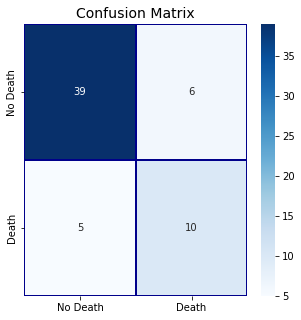

In [32]:
cf_matrix = confusion_matrix(ytest.round(), y_pred.round())
#cf_matrix
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cf_matrix, 
            xticklabels=['No Death', 'Death'],
            yticklabels=['No Death', 'Death'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [35]:
from tensorflow.keras.layers import Dense, Dropout

model=Sequential()

model.add(Dense(90, input_dim = 12, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(40, activation='relu'))
model.add(Dropout(0.5))

# sigmoid output between 0 and 1
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 90)                1170      
                                                                 
 dropout (Dropout)           (None, 90)                0         
                                                                 
 dense_8 (Dense)             (None, 40)                3640      
                                                                 
 dropout_1 (Dropout)         (None, 40)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 41        
                                                                 
Total params: 4,851
Trainable params: 4,851
Non-trainable params: 0
_________________________________________________________________


In [38]:
from keras.callbacks import History
from keras.callbacks import ModelCheckpoint, EarlyStopping

history = History()
History = model.fit(x=xtrain, y=ytrain, validation_data=(xtest, ytest), epochs=60, callbacks=[history])

Epoch 1/60
8/8 [==============================] - 1s 23ms/step - loss: 0.7166 - accuracy: 0.4812 - val_loss: 0.6429 - val_accuracy: 0.7500
Epoch 2/60
8/8 [==============================] - 0s 7ms/step - loss: 0.6928 - accuracy: 0.5230 - val_loss: 0.6027 - val_accuracy: 0.7500
Epoch 3/60
8/8 [==============================] - 0s 6ms/step - loss: 0.6732 - accuracy: 0.6192 - val_loss: 0.5773 - val_accuracy: 0.7500
Epoch 4/60
8/8 [==============================] - 0s 8ms/step - loss: 0.6281 - accuracy: 0.6778 - val_loss: 0.5620 - val_accuracy: 0.7500
Epoch 5/60
8/8 [==============================] - 0s 8ms/step - loss: 0.6227 - accuracy: 0.6736 - val_loss: 0.5499 - val_accuracy: 0.7500
Epoch 6/60
8/8 [==============================] - 0s 11ms/step - loss: 0.6194 - accuracy: 0.6736 - val_loss: 0.5414 - val_accuracy: 0.7500
Epoch 7/60
8/8 [==============================] - 0s 12ms/step - loss: 0.6150 - accuracy: 0.6695 - val_loss: 0.5326 - val_accuracy: 0.7500
Epoch 8/60
8/8 [===============

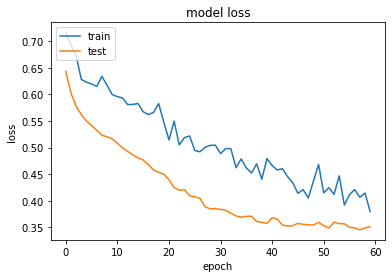

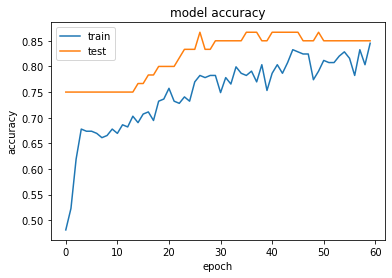

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()